# WeatherPy
----

### Analysis
* Wind speed and latitude would not be connected unless latitudes could be narrowed for known topographic features.

---

#### Note
* Due to issue with constructing a dataframe/set, plots were constructed with a small created csv

In [2]:
# Dependencies and Setup
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [100]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)



613
['kuzhener', 'puerto ayora', 'busselton', 'hermanus', 'nikolskoye', 'rikitea', 'san quintin', 'bluff', 'avarua', 'punta arenas', 'antalaha', 'bengkulu', 'albany', 'butaritari', 'east london', 'yulin', 'hithadhoo', 'illoqqortoormiut', 'cape town', 'padang', 'castro', 'hilo', 'hami', 'ushuaia', 'atuona', 'saint-philippe', 'maceio', 'taolanaro', 'constitucion', 'beringovskiy', 'hay river', 'sinegorye', 'cowra', 'fort nelson', 'homer', 'bowen', 'kolpashevo', 'bargal', 'bogorodskoye', 'huazolotitlan', 'northam', 'rincon', 'asyut', 'evensk', 'ponta do sol', 'tuatapere', 'anloga', 'mutare', 'severo-yeniseyskiy', 'kankaanpaa', 'chivolo', 'ribeira grande', 'kaitangata', 'emerald', 'mahebourg', 'clyde river', 'samarai', 'grand gaube', 'mataura', 'torbay', 'tasiilaq', 'new norfolk', 'hobart', 'amuntai', 'chuy', 'grand river south east', 'grindavik', 'kuche', 'nemuro', 'severo-kurilsk', 'pemangkat', 'yerbogachen', 'vaini', 'esperance', 'zhangjiakou', 'bredasdorp', 'namboongan', 'belmonte', 'ol

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [101]:
#testing api call


base_url= "https://api.openweathermap.org/data/2.5/weather?q="
url=base_url+cityName+"&appid="+api_key


#retrieve data
#apiData=requests.get(url).json()
#apiDataJson=json.dumps(apiData, indent=4,sort_keys=True)



In [161]:
# i tried!!  this is the same issue I've had in previous exercises distinguishing different types of data.  
#although the data is retrieved, I can't get the append to work because of issues with different types
#of objects.  when I tried to save, only can save one line.

for cityName in cities:
    url=base_url+cityName+"&appid="+api_key
#    print(url)
#    print(cityName)

    apiData=requests.get(url).json()

    #    print (len(apiData))


In [164]:
#store data in  csv and dataframe

api_data=pd.io.json.json_normalize(apiData)

#df = pd.DataFrame(np.array(my_list)
api_data.to_csv("output_data/output_data_file.csv")


In [165]:
#using fake data because can't sort out the append
# Read the data file
dataAPI_df=pd.read_csv('madeup_data.txt')


# store in DataFrame
data_APIdf = pd.DataFrame({
                            "City ID":dataAPI_df["id"], 
                             "City Name":dataAPI_df["name"],
                            "Temperature":dataAPI_df["temp"],
                            "Humidity":dataAPI_df["humidity"],
                             "Latitude":dataAPI_df["lat"],
                            "Longitude": dataAPI_df["lon"], 
                                "Cloudiness":dataAPI_df["clouds"],
                          "Max Temp":dataAPI_df["temp_max"],
                          "Wind Speed":dataAPI_df["speed"]
                          })


# Preview DataFrame
data_APIdf.head(10)


,City ID,City Name,Temperature,Humidity,Latitude,Longitude,Cloudiness,Max Temp,Wind Speed
0,123,oklahoma city,89,95%,53,42,yes,91,15
1,128,tampa,42,90%,21,42,cloudy,89,2
2,134,san diego,68,52%,38,82,partly,81,8
3,142,san juan,76,78%,10,32,clear,80,12
4,581,glasgow,65,55%,68,92,clear,83,16
5,678,cairo,87,32%,43,86,partly,88,3
6,923,guadalajara,78,70%,87,32,cloudy,84,11
7,789,london,34,63%,76,34,cloudy,65,18
8,374,moscow,45,8%,87,43,clear,65,20
9,987,orlando,94,100%,98,33,clear,95,1


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [166]:
data_APIdf.to_csv("output_data/output_data2_file.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

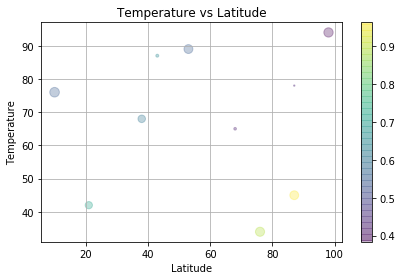

In [167]:
#define axis
#x_axis=np.array(drugTimePiv.index)
x_axis=np.array(data_APIdf["Latitude"])
y_axis=np.array(data_APIdf["Temperature"])

#Scatter formatting
rng = np.random.RandomState(0)
colors = rng.rand(10)
sizes = 100 * rng.rand(10)


#Grid Formatting
tick_locations=[value +5 for value in x_axis]
plt.xticks=(tick_locations)
plt.grid(which='major', axis='both')
plt.title("Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")



#plot latitude vs temperature
plt.scatter(x_axis, y_axis, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar()

#plt.legend(loc="upper left")

# Save the Figure
plt.savefig("output_data/tempVsLat.png")
plt.tight_layout()
plt.show()


#### Latitude vs. Humidity Plot

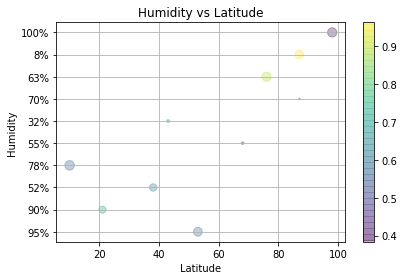

In [168]:
#define axis
#x_axis=np.array(drugTimePiv.index)
x_axis=np.array(data_APIdf["Latitude"])
y_axis=np.array(data_APIdf["Humidity"])

#Scatter formatting
rng = np.random.RandomState(0)
colors = rng.rand(10)
sizes = 100 * rng.rand(10)


#Grid Formatting
tick_locations=[value +5 for value in x_axis]
plt.xticks=(tick_locations)
plt.grid(which='major', axis='both')
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")



#plot latitude vs temperature
plt.scatter(x_axis, y_axis, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar()

#plt.legend(loc="upper left")

# Save the Figure
plt.savefig("output_data/humidVsLat.png")
plt.tight_layout()
plt.show()


#### Latitude vs. Cloudiness Plot

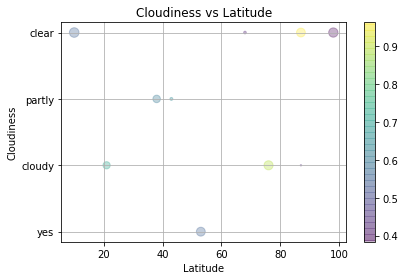

In [169]:
#define axis
#x_axis=np.array(drugTimePiv.index)
x_axis=np.array(data_APIdf["Latitude"])
y_axis=np.array(data_APIdf["Cloudiness"])

#Scatter formatting
rng = np.random.RandomState(0)
colors = rng.rand(10)
sizes = 100 * rng.rand(10)


#Grid Formatting
tick_locations=[value +5 for value in x_axis]
plt.xticks=(tick_locations)
plt.grid(which='major', axis='both')
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")



#plot latitude vs temperature
plt.scatter(x_axis, y_axis, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar()

#plt.legend(loc="upper left")

# Save the Figure
plt.savefig("output_data/cloudsVsLat.png")
plt.tight_layout()
plt.show()

#### Latitude vs. Wind Speed Plot

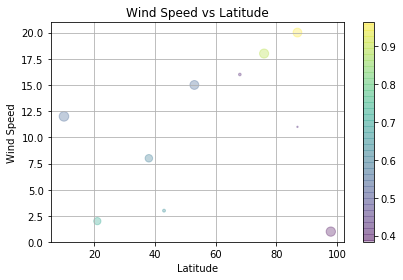

In [170]:
#define axis
#x_axis=np.array(drugTimePiv.index)
x_axis=np.array(data_APIdf["Latitude"])
y_axis=np.array(data_APIdf["Wind Speed"])

#Scatter formatting
rng = np.random.RandomState(0)
colors = rng.rand(10)
sizes = 100 * rng.rand(10)


#Grid Formatting
tick_locations=[value +5 for value in x_axis]
plt.xticks=(tick_locations)
plt.grid(which='major', axis='both')
plt.title("Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")



#plot latitude vs temperature
plt.scatter(x_axis, y_axis, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar()

#plt.legend(loc="upper left")

# Save the Figure
plt.savefig("output_data/windVsLat.png")
plt.tight_layout()
plt.show()